In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import transforms
import torchvision
import torch.optim as optim
import pytorch_lightning as pl
import copy
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
import torchmetrics
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device=torch.device("cpu")
print(device)

cuda:0


In [3]:
classes=['Covid','No Covid']
num_classes=2
batch_size=4

In [4]:
dataset = torchvision.datasets.ImageFolder(root="./data",transform=transforms.Compose([
                                                            transforms.ToTensor(),
                                                            transforms.Resize([227,227]),
#                                                             transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                                                            ]))
print(len(dataset))
trainset,testset=torch.utils.data.random_split(dataset,[round(0.8*len(dataset)),round(0.2*len(dataset))],generator=torch.Generator().manual_seed(42))
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

8088


In [5]:
class AlexNet(nn.Module):
    def get_first_FC_Layer(self,x):
            x=self.feature_extractor(x).flatten(1)
            x=self.classifier[0](x)
            return x;
    def get_Representation_Net(self,x):
            x=self.feature_extractor(x).flatten(1)
            return  x;
    def __init__(self):
        super().__init__()
        # init a pretrained vggnet
        backbone = models.alexnet(pretrained=True)
        layers = list(backbone.children())[:-1]
        self.feature_extractor = nn.Sequential(*layers)
        fc=[]
        fc.extend([nn.Linear(in_features=9216,out_features=512),
           nn.ReLU(),
           nn.Dropout(),
           nn.Linear(in_features=512,out_features=128),
           nn.ReLU(),
           nn.Dropout(),
           nn.Linear(in_features=128,out_features=1)
          ])
        self.classifier=nn.Sequential(*fc)
        for param in self.feature_extractor.parameters():
            param.requires_grad=False
    def forward(self, x):
        with torch.no_grad():
            representations = self.feature_extractor(x).flatten(1)
        x=self.classifier(representations)
        return x;

In [6]:
net = AlexNet()
net.load_state_dict(torch.load("Alex-final.pth").state_dict())

<All keys matched successfully>

In [7]:
X_Train=np.empty((0,512))
Y_Train=np.empty((0,batch_size))
print(X_Train.shape)
for i,data in enumerate(trainloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    FCLayer=net.get_first_FC_Layer(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Train=np.append(X_Train,FCLayer,axis=0)
    Y_Train=np.append(Y_Train,labels.numpy())
print(X_Train.shape,Y_Train.shape)

(0, 512)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the bat

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


Done with the batch: 660
Done with the batch: 661
Done with the batch: 662
Done with the batch: 663
Done with the batch: 664
Done with the batch: 665
Done with the batch: 666
Done with the batch: 667
Done with the batch: 668
Done with the batch: 669
Done with the batch: 670
Done with the batch: 671
Done with the batch: 672
Done with the batch: 673
Done with the batch: 674
Done with the batch: 675
Done with the batch: 676
Done with the batch: 677
Done with the batch: 678
Done with the batch: 679
Done with the batch: 680
Done with the batch: 681
Done with the batch: 682
Done with the batch: 683
Done with the batch: 684
Done with the batch: 685
Done with the batch: 686
Done with the batch: 687
Done with the batch: 688
Done with the batch: 689
Done with the batch: 690
Done with the batch: 691
Done with the batch: 692
Done with the batch: 693
Done with the batch: 694
Done with the batch: 695
Done with the batch: 696
Done with the batch: 697
Done with the batch: 698
Done with the batch: 699


Done with the batch: 988
Done with the batch: 989
Done with the batch: 990
Done with the batch: 991
Done with the batch: 992
Done with the batch: 993
Done with the batch: 994
Done with the batch: 995
Done with the batch: 996
Done with the batch: 997
Done with the batch: 998
Done with the batch: 999
Done with the batch: 1000
Done with the batch: 1001
Done with the batch: 1002
Done with the batch: 1003
Done with the batch: 1004
Done with the batch: 1005
Done with the batch: 1006
Done with the batch: 1007
Done with the batch: 1008
Done with the batch: 1009
Done with the batch: 1010
Done with the batch: 1011
Done with the batch: 1012
Done with the batch: 1013
Done with the batch: 1014
Done with the batch: 1015
Done with the batch: 1016
Done with the batch: 1017
Done with the batch: 1018
Done with the batch: 1019
Done with the batch: 1020
Done with the batch: 1021
Done with the batch: 1022
Done with the batch: 1023
Done with the batch: 1024
Done with the batch: 1025
Done with the batch: 102

Done with the batch: 1304
Done with the batch: 1305
Done with the batch: 1306
Done with the batch: 1307
Done with the batch: 1308
Done with the batch: 1309
Done with the batch: 1310
Done with the batch: 1311
Done with the batch: 1312
Done with the batch: 1313
Done with the batch: 1314
Done with the batch: 1315
Done with the batch: 1316
Done with the batch: 1317
Done with the batch: 1318
Done with the batch: 1319
Done with the batch: 1320
Done with the batch: 1321
Done with the batch: 1322
Done with the batch: 1323
Done with the batch: 1324
Done with the batch: 1325
Done with the batch: 1326
Done with the batch: 1327
Done with the batch: 1328
Done with the batch: 1329
Done with the batch: 1330
Done with the batch: 1331
Done with the batch: 1332
Done with the batch: 1333
Done with the batch: 1334
Done with the batch: 1335
Done with the batch: 1336
Done with the batch: 1337
Done with the batch: 1338
Done with the batch: 1339
Done with the batch: 1340
Done with the batch: 1341
Done with th

In [8]:
X_Test=np.empty((0,512))
Y_Test=np.empty((0,batch_size))
print(X_Test.shape)
for i,data in enumerate(testloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    FCLayer=net.get_first_FC_Layer(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Test=np.append(X_Test,FCLayer,axis=0)
    Y_Test=np.append(Y_Test,labels.numpy())
print(X_Test.shape,Y_Test.shape)

(0, 512)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the bat

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


## Getting the feature extraction layer

In [9]:
X_Train_FeatureMap=np.empty((0,9216))
Y_Train_FeatureMap=np.empty((0,batch_size))
print(X_Train_FeatureMap.shape)
for i,data in enumerate(trainloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    featureMap=net.get_Representation_Net(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Train_FeatureMap=np.append(X_Train_FeatureMap,featureMap,axis=0)
    Y_Train_FeatureMap=np.append(Y_Train_FeatureMap,labels.numpy())
print(X_Train_FeatureMap.shape,Y_Train_FeatureMap.shape)

(0, 9216)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the ba

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


Done with the batch: 661
Done with the batch: 662
Done with the batch: 663
Done with the batch: 664
Done with the batch: 665
Done with the batch: 666
Done with the batch: 667
Done with the batch: 668
Done with the batch: 669
Done with the batch: 670
Done with the batch: 671
Done with the batch: 672
Done with the batch: 673
Done with the batch: 674
Done with the batch: 675
Done with the batch: 676
Done with the batch: 677
Done with the batch: 678
Done with the batch: 679
Done with the batch: 680
Done with the batch: 681
Done with the batch: 682
Done with the batch: 683
Done with the batch: 684
Done with the batch: 685
Done with the batch: 686
Done with the batch: 687
Done with the batch: 688
Done with the batch: 689
Done with the batch: 690
Done with the batch: 691
Done with the batch: 692
Done with the batch: 693
Done with the batch: 694
Done with the batch: 695
Done with the batch: 696
Done with the batch: 697
Done with the batch: 698
Done with the batch: 699
Done with the batch: 700


Done with the batch: 990
Done with the batch: 991
Done with the batch: 992
Done with the batch: 993
Done with the batch: 994
Done with the batch: 995
Done with the batch: 996
Done with the batch: 997
Done with the batch: 998
Done with the batch: 999
Done with the batch: 1000
Done with the batch: 1001
Done with the batch: 1002
Done with the batch: 1003
Done with the batch: 1004
Done with the batch: 1005
Done with the batch: 1006
Done with the batch: 1007
Done with the batch: 1008
Done with the batch: 1009
Done with the batch: 1010
Done with the batch: 1011
Done with the batch: 1012
Done with the batch: 1013
Done with the batch: 1014
Done with the batch: 1015
Done with the batch: 1016
Done with the batch: 1017
Done with the batch: 1018
Done with the batch: 1019
Done with the batch: 1020
Done with the batch: 1021
Done with the batch: 1022
Done with the batch: 1023
Done with the batch: 1024
Done with the batch: 1025
Done with the batch: 1026
Done with the batch: 1027
Done with the batch: 1

Done with the batch: 1307
Done with the batch: 1308
Done with the batch: 1309
Done with the batch: 1310
Done with the batch: 1311
Done with the batch: 1312
Done with the batch: 1313
Done with the batch: 1314
Done with the batch: 1315
Done with the batch: 1316
Done with the batch: 1317
Done with the batch: 1318
Done with the batch: 1319
Done with the batch: 1320
Done with the batch: 1321
Done with the batch: 1322
Done with the batch: 1323
Done with the batch: 1324
Done with the batch: 1325
Done with the batch: 1326
Done with the batch: 1327
Done with the batch: 1328
Done with the batch: 1329
Done with the batch: 1330
Done with the batch: 1331
Done with the batch: 1332
Done with the batch: 1333
Done with the batch: 1334
Done with the batch: 1335
Done with the batch: 1336
Done with the batch: 1337
Done with the batch: 1338
Done with the batch: 1339
Done with the batch: 1340
Done with the batch: 1341
Done with the batch: 1342
Done with the batch: 1343
Done with the batch: 1344
Done with th

In [10]:
X_Test_FeatureMap=np.empty((0,9216))
Y_Test_FeatureMap=np.empty((0,batch_size))
print(X_Test_FeatureMap.shape)
for i,data in enumerate(testloader):
    print(f'Done with the batch: {i}')
    images,labels=data
    featuremap=net.get_Representation_Net(images).detach().numpy();
#     print(FCLayer,FCLayer.shape,labels.numpy())
    X_Test_FeatureMap=np.append(X_Test_FeatureMap,featuremap,axis=0)
    Y_Test_FeatureMap=np.append(Y_Test_FeatureMap,labels.numpy())
print(X_Test_FeatureMap.shape,Y_Test_FeatureMap.shape)

(0, 9216)
Done with the batch: 0
Done with the batch: 1
Done with the batch: 2
Done with the batch: 3
Done with the batch: 4
Done with the batch: 5
Done with the batch: 6
Done with the batch: 7
Done with the batch: 8
Done with the batch: 9
Done with the batch: 10
Done with the batch: 11
Done with the batch: 12
Done with the batch: 13
Done with the batch: 14
Done with the batch: 15
Done with the batch: 16
Done with the batch: 17
Done with the batch: 18
Done with the batch: 19
Done with the batch: 20
Done with the batch: 21
Done with the batch: 22
Done with the batch: 23
Done with the batch: 24
Done with the batch: 25
Done with the batch: 26
Done with the batch: 27
Done with the batch: 28
Done with the batch: 29
Done with the batch: 30
Done with the batch: 31
Done with the batch: 32
Done with the batch: 33
Done with the batch: 34
Done with the batch: 35
Done with the batch: 36
Done with the batch: 37
Done with the batch: 38
Done with the batch: 39
Done with the batch: 40
Done with the ba

Done with the batch: 332
Done with the batch: 333
Done with the batch: 334
Done with the batch: 335
Done with the batch: 336
Done with the batch: 337
Done with the batch: 338
Done with the batch: 339
Done with the batch: 340
Done with the batch: 341
Done with the batch: 342
Done with the batch: 343
Done with the batch: 344
Done with the batch: 345
Done with the batch: 346
Done with the batch: 347
Done with the batch: 348
Done with the batch: 349
Done with the batch: 350
Done with the batch: 351
Done with the batch: 352
Done with the batch: 353
Done with the batch: 354
Done with the batch: 355
Done with the batch: 356
Done with the batch: 357
Done with the batch: 358
Done with the batch: 359
Done with the batch: 360
Done with the batch: 361
Done with the batch: 362
Done with the batch: 363
Done with the batch: 364
Done with the batch: 365
Done with the batch: 366
Done with the batch: 367
Done with the batch: 368
Done with the batch: 369
Done with the batch: 370
Done with the batch: 371


## SVM

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score,recall_score
from sklearn.model_selection import KFold

In [13]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score,recall_score

In [31]:
tuned_parameters = {'kernel': ['rbf'], 'gamma': [0.00001,0.000001],
                     'C': [ 10],
}
# tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-3],
#                      'C': [0.001],
#                    }
clf = GridSearchCV(
        SVC(), tuned_parameters, scoring= 'accuracy',verbose=10
    )
clf.fit(X_Train, Y_Train.ravel())

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START C=10, gamma=1e-05, kernel=rbf...............................
[CV 1/5; 1/2] END C=10, gamma=1e-05, kernel=rbf;, score=0.978 total time=   0.8s
[CV 2/5; 1/2] START C=10, gamma=1e-05, kernel=rbf...............................
[CV 2/5; 1/2] END C=10, gamma=1e-05, kernel=rbf;, score=0.971 total time=   0.8s
[CV 3/5; 1/2] START C=10, gamma=1e-05, kernel=rbf...............................
[CV 3/5; 1/2] END C=10, gamma=1e-05, kernel=rbf;, score=0.979 total time=   0.7s
[CV 4/5; 1/2] START C=10, gamma=1e-05, kernel=rbf...............................
[CV 4/5; 1/2] END C=10, gamma=1e-05, kernel=rbf;, score=0.978 total time=   0.7s
[CV 5/5; 1/2] START C=10, gamma=1e-05, kernel=rbf...............................
[CV 5/5; 1/2] END C=10, gamma=1e-05, kernel=rbf;, score=0.975 total time=   0.8s
[CV 1/5; 2/2] START C=10, gamma=1e-06, kernel=rbf...............................
[CV 1/5; 2/2] END C=10, gamma=1e-06, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [10], 'gamma': [1e-05, 1e-06], 'kernel': ['rbf']},
             scoring='accuracy', verbose=10)

In [30]:
def k_fold_cv_svm(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
#         clf=SVC(C=10,kernel='rbf',gamma=0.0001)
        clf=SVC(C=10,kernel='rbf',gamma=10)
        clf.fit(X_train,y_train.ravel())
        y_pred = clf.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del clf
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return clf

In [14]:
clf=k_fold_cv_svm(X_Train,Y_Train.ravel())
clf=SVC(C=10,kernel='rbf',gamma=0.0001)
clf.fit(X_Train,Y_Train.ravel())
y_pred = clf.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 97.44976816074188
FOLD 1
--------------------------------
Accuracy: 97.44976816074188
FOLD 2
--------------------------------
Accuracy: 97.60432766615146
FOLD 3
--------------------------------
Accuracy: 97.3724884080371
FOLD 4
--------------------------------
Accuracy: 97.75888717156104
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 97.44976816074188 %
Fold 1: 97.44976816074188 %
Fold 2: 97.60432766615146 %
Fold 3: 97.3724884080371 %
Fold 4: 97.75888717156104 %
Average: 97.52704791344668 %
Accuracy:  0.9493201483312732
F1-Score:  0.9504830917874396
Precision:  0.9391408114558473
Recall:  0.9621026894865525
AUC:  0.9491763447432764


## Descision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
def k_fold_cv_dtree(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        decision_tree = DecisionTreeClassifier(random_state=102)
        decision_tree = decision_tree.fit(X_train, y_train.ravel())
        y_pred = decision_tree.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del decision_tree
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return decision_tree

In [17]:
dtree=k_fold_cv_dtree(X_Train,Y_Train.ravel())
dtree = DecisionTreeClassifier(random_state=102)
dtree = dtree.fit(X_Train, Y_Train.ravel())
y_pred=dtree.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 95.5950540958269
FOLD 1
--------------------------------
Accuracy: 95.28593508500772
FOLD 2
--------------------------------
Accuracy: 95.44049459041732
FOLD 3
--------------------------------
Accuracy: 95.82689335394127
FOLD 4
--------------------------------
Accuracy: 95.44049459041732
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 95.5950540958269 %
Fold 1: 95.28593508500772 %
Fold 2: 95.44049459041732 %
Fold 3: 95.82689335394127 %
Fold 4: 95.44049459041732 %
Average: 95.5177743431221 %
Accuracy:  0.9295426452410384
F1-Score:  0.931159420289855
Precision:  0.9200477326968973
Recall:  0.9425427872860636
AUC:  0.9293963936430317


## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
def k_fold_cv_rforest(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        random_forest = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=102)
        random_forest = random_forest.fit(X_train, y_train.ravel())
        y_pred = random_forest.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del random_forest
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return random_forest

In [20]:
random_forest=k_fold_cv_rforest(X_Train,Y_Train.ravel())
random_forest = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=102)
random_forest = random_forest.fit(X_Train, Y_Train.ravel())
y_pred=random_forest.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 97.3724884080371
FOLD 1
--------------------------------
Accuracy: 97.21792890262752
FOLD 2
--------------------------------
Accuracy: 96.83153013910355
FOLD 3
--------------------------------
Accuracy: 96.75425038639877
FOLD 4
--------------------------------
Accuracy: 96.90880989180835
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 97.3724884080371 %
Fold 1: 97.21792890262752 %
Fold 2: 96.83153013910355 %
Fold 3: 96.75425038639877 %
Fold 4: 96.90880989180835 %
Average: 97.01700154559506 %
Accuracy:  0.9480840543881335
F1-Score:  0.9493975903614457
Precision:  0.9358669833729216
Recall:  0.9633251833740831
AUC:  0.9479125916870416


## XGBOOST

In [21]:
import xgboost as xgb

In [22]:
def k_fold_cv_xgb(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        eval_set = [(X_train, y_train.ravel()), (X_test, y_test)]
        xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=102,use_label_encoder=False)
        xg_cl.fit(X_train,y_train.ravel())
        y_pred = xg_cl.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del xg_cl
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return xg_cl

In [23]:
xg=k_fold_cv_xgb(X_Train,Y_Train.ravel())
xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=102,use_label_encoder=False)
xg.fit(X_Train,Y_Train.ravel())
y_pred=xg.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test.ravel(),y_pred))

FOLD 0
--------------------------------
[13:16:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 97.21792890262752
FOLD 1
--------------------------------
[13:16:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 97.44976816074188
FOLD 2
--------------------------------
[13:16:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

## MLP

In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
def k_fold_cv_mlp(X,Y,k_folds=5):
    kfold = KFold(n_splits=k_folds, shuffle=True)
    # Initialize optimizer
    results = {}
    for fold, (train_ids, test_ids) in enumerate(kfold.split(X)): 
        print(f'FOLD {fold}')
        print('--------------------------------')
        X_train, X_test = X[train_ids], X[test_ids]
        y_train, y_test = Y[train_ids], Y[test_ids]
        clf = MLPClassifier(random_state=102, max_iter=3000, verbose=True).fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        results[fold] = 100.0 * accuracy_score(y_test, y_pred)
        print("Accuracy:",results[fold])
        if fold != k_folds-1:
            # The last model used for testing accuracy
            del clf
    # Print fold results
    print(f'K-FOLD CROSS VALIDATION RESULTS FOR {k_folds} FOLDS')
    print('--------------------------------')
    sum = 0.0
    for key, value in results.items():
        print(f'Fold {key}: {value} %')
        sum += value
    print(f'Average: {sum/len(results.items())} %')
    return clf

In [26]:
clf=k_fold_cv_mlp(X_Train,Y_Train.ravel())
clf=MLPClassifier(random_state=102, max_iter=3000, verbose=True).fit(X_Train, Y_Train.ravel())
y_pred=clf.predict(X_Test)
print("Accuracy: ",accuracy_score(Y_Test.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test.ravel(),y_pred))

FOLD 0
--------------------------------
Iteration 1, loss = 2.31436879
Iteration 2, loss = 0.64877478
Iteration 3, loss = 0.43697674
Iteration 4, loss = 0.29534227
Iteration 5, loss = 0.36562999
Iteration 6, loss = 0.22380921
Iteration 7, loss = 0.17829742
Iteration 8, loss = 0.15070429
Iteration 9, loss = 0.19436743
Iteration 10, loss = 0.27212054
Iteration 11, loss = 0.16142227
Iteration 12, loss = 0.15752155
Iteration 13, loss = 0.13221344
Iteration 14, loss = 0.20883414
Iteration 15, loss = 0.17187292
Iteration 16, loss = 0.20812398
Iteration 17, loss = 0.15722967
Iteration 18, loss = 0.18566158
Iteration 19, loss = 0.17869708
Iteration 20, loss = 0.17827724
Iteration 21, loss = 0.15504893
Iteration 22, loss = 0.12517334
Iteration 23, loss = 0.10987619
Iteration 24, loss = 0.21752572
Iteration 25, loss = 0.17122297
Iteration 26, loss = 0.11720636
Iteration 27, loss = 0.18613581
Iteration 28, loss = 0.20247457
Iteration 29, loss = 0.17135059
Iteration 30, loss = 0.18003567
Iteration

## PCA

In [27]:
from sklearn.decomposition import KernelPCA

Text(0, 0.5, 'cumulative explained variance')

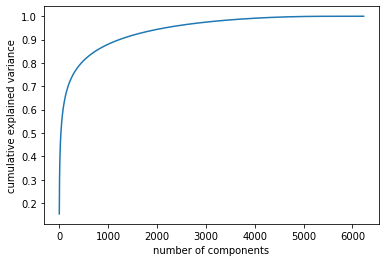

In [37]:
kpca = KernelPCA(kernel = 'rbf')
kpca_transform = kpca.fit_transform(X_Train_FeatureMap)
explained_variance = np.var(kpca_transform, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [28]:
kpca = KernelPCA(kernel = 'rbf',n_components=4500)
X_Train_Transformed_FeatureMap = kpca.fit_transform(X_Train_FeatureMap)
print(X_Train_Transformed_FeatureMap.shape)

(6470, 4500)


In [29]:
X_Test_Transformed_FeatureMap = kpca.transform(X_Test_FeatureMap)

print(X_Test_FeatureMap.shape,X_Test_Transformed_FeatureMap.shape)

(1618, 9216) (1618, 4500)


In [31]:
clf=k_fold_cv_svm(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
clf=SVC(C=10,kernel='rbf',gamma=10)
clf.fit(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
y_pred=clf.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 93.89489953632149
FOLD 1
--------------------------------
Accuracy: 94.20401854714065
FOLD 2
--------------------------------
Accuracy: 93.81761978361669
FOLD 3
--------------------------------
Accuracy: 92.96754250386398
FOLD 4
--------------------------------
Accuracy: 94.43585780525503
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 93.89489953632149 %
Fold 1: 94.20401854714065 %
Fold 2: 93.81761978361669 %
Fold 3: 92.96754250386398 %
Fold 4: 94.43585780525503 %
Average: 93.86398763523957 %
Accuracy:  0.946229913473424
F1-Score:  0.9476849067949489
Precision:  0.9325443786982248
Recall:  0.9633251833740831
AUC:  0.9460375916870416


## Decision Tree

In [32]:
dtree=k_fold_cv_dtree(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
dtree = DecisionTreeClassifier(random_state=102)
dtree = dtree.fit(X_Train_Transformed_FeatureMap, Y_Train_FeatureMap.ravel())
y_pred=dtree.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 83.77125193199382
FOLD 1
--------------------------------
Accuracy: 81.45285935085008
FOLD 2
--------------------------------
Accuracy: 81.99381761978361
FOLD 3
--------------------------------
Accuracy: 83.53941267387944
FOLD 4
--------------------------------
Accuracy: 83.30757341576506
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 83.77125193199382 %
Fold 1: 81.45285935085008 %
Fold 2: 81.99381761978361 %
Fold 3: 83.53941267387944 %
Fold 4: 83.30757341576506 %
Average: 82.81298299845442 %
Accuracy:  0.8510506798516687
F1-Score:  0.8529591214154973
Precision:  0.8514007308160779
Recall:  0.8545232273838631
AUC:  0.8510116136919316


## XGBOOST

In [34]:
xg=k_fold_cv_xgb(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=102,use_label_encoder=False)
xg.fit(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
y_pred=xg.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
[13:45:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 90.95826893353942
FOLD 1
--------------------------------
[13:47:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 92.73570324574962
FOLD 2
--------------------------------
[13:49:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was

## MLP

In [35]:
clf=k_fold_cv_mlp(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
clf=MLPClassifier(random_state=102, max_iter=3000, verbose=True).fit(X_Train_Transformed_FeatureMap, Y_Train_FeatureMap.ravel())
y_pred=clf.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Iteration 1, loss = 0.68304353
Iteration 2, loss = 0.63329516
Iteration 3, loss = 0.55342882
Iteration 4, loss = 0.45238023
Iteration 5, loss = 0.35204783
Iteration 6, loss = 0.27129828
Iteration 7, loss = 0.21366096
Iteration 8, loss = 0.17285786
Iteration 9, loss = 0.14373195
Iteration 10, loss = 0.12169946
Iteration 11, loss = 0.10463887
Iteration 12, loss = 0.09115669
Iteration 13, loss = 0.08007296
Iteration 14, loss = 0.07094668
Iteration 15, loss = 0.06328878
Iteration 16, loss = 0.05720615
Iteration 17, loss = 0.05166136
Iteration 18, loss = 0.04681173
Iteration 19, loss = 0.04302635
Iteration 20, loss = 0.03951163
Iteration 21, loss = 0.03657810
Iteration 22, loss = 0.03417189
Iteration 23, loss = 0.03192282
Iteration 24, loss = 0.02990481
Iteration 25, loss = 0.02825091
Iteration 26, loss = 0.02687078
Iteration 27, loss = 0.02526200
Iteration 28, loss = 0.02437399
Iteration 29, loss = 0.02312562
Iteration 30, loss = 0.02260752
Iteration

Iteration 31, loss = 0.02198461
Iteration 32, loss = 0.02112799
Iteration 33, loss = 0.02036806
Iteration 34, loss = 0.01995237
Iteration 35, loss = 0.01935673
Iteration 36, loss = 0.01906117
Iteration 37, loss = 0.01857889
Iteration 38, loss = 0.01791134
Iteration 39, loss = 0.01757788
Iteration 40, loss = 0.01723922
Iteration 41, loss = 0.01706712
Iteration 42, loss = 0.01646165
Iteration 43, loss = 0.01661413
Iteration 44, loss = 0.01604577
Iteration 45, loss = 0.01608625
Iteration 46, loss = 0.01573751
Iteration 47, loss = 0.01538616
Iteration 48, loss = 0.01518959
Iteration 49, loss = 0.01519724
Iteration 50, loss = 0.01488247
Iteration 51, loss = 0.01495667
Iteration 52, loss = 0.01451617
Iteration 53, loss = 0.01454734
Iteration 54, loss = 0.01427805
Iteration 55, loss = 0.01443871
Iteration 56, loss = 0.01417240
Iteration 57, loss = 0.01377040
Iteration 58, loss = 0.01409378
Iteration 59, loss = 0.01399090
Iteration 60, loss = 0.01398830
Iteration 61, loss = 0.01356969
Iteratio

Iteration 81, loss = 0.01377876
Iteration 82, loss = 0.01372677
Iteration 83, loss = 0.01396824
Iteration 84, loss = 0.01392178
Iteration 85, loss = 0.01390997
Iteration 86, loss = 0.01364692
Iteration 87, loss = 0.01326352
Iteration 88, loss = 0.01354401
Iteration 89, loss = 0.01364730
Iteration 90, loss = 0.01349330
Iteration 91, loss = 0.01337786
Iteration 92, loss = 0.01357454
Iteration 93, loss = 0.01347233
Iteration 94, loss = 0.01358245
Iteration 95, loss = 0.01334026
Iteration 96, loss = 0.01380095
Iteration 97, loss = 0.01352448
Iteration 98, loss = 0.01320684
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 94.89953632148377
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 94.43585780525503 %
Fold 1: 95.82689335394127 %
Fold 2: 95.5177743431221 %
Fold 3: 96.21329211746522 %
Fold 4: 94.89953632148377 %
Average: 95.37867078825347 %
Iteration 1, loss = 0.67854178
Iteration 2, loss = 0.60757735

## Random Forest

In [33]:
random_forest=k_fold_cv_rforest(X_Train_Transformed_FeatureMap,Y_Train_FeatureMap.ravel())
random_forest = RandomForestClassifier(n_estimators=100,criterion='gini',random_state=102)
random_forest = random_forest.fit(X_Train_Transformed_FeatureMap, Y_Train_FeatureMap.ravel())
y_pred=random_forest.predict(X_Test_Transformed_FeatureMap)
print("Accuracy: ",accuracy_score(Y_Test_FeatureMap.ravel(),y_pred))
print("F1-Score: ",f1_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Precision: ",precision_score(Y_Test_FeatureMap.ravel(),y_pred))
print("Recall: ",recall_score(Y_Test_FeatureMap.ravel(),y_pred))
print("AUC: ",roc_auc_score(Y_Test_FeatureMap.ravel(),y_pred))

FOLD 0
--------------------------------
Accuracy: 80.83462132921174
FOLD 1
--------------------------------
Accuracy: 77.58887171561051
FOLD 2
--------------------------------
Accuracy: 80.13910355486863
FOLD 3
--------------------------------
Accuracy: 78.67078825347758
FOLD 4
--------------------------------
Accuracy: 79.28902627511592
K-FOLD CROSS VALIDATION RESULTS FOR 5 FOLDS
--------------------------------
Fold 0: 80.83462132921174 %
Fold 1: 77.58887171561051 %
Fold 2: 80.13910355486863 %
Fold 3: 78.67078825347758 %
Fold 4: 79.28902627511592 %
Average: 79.30448222565687 %
Accuracy:  0.8411619283065513
F1-Score:  0.8398753894080997
Precision:  0.8564167725540025
Recall:  0.823960880195599
AUC:  0.8413554400977995
